## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    classification_report,
    confusion_matrix
)

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Load the credit card dataset
df = pd.read_csv('../data/raw/creditcard.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (284807, 31)


## 3. Basic Data Exploration

In [3]:
# Display basic information about the dataset
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n" + "="*50 + "\n")

print("First 5 rows:")
display(df.head())
print("\n" + "="*50 + "\n")

print("Data types and non-null counts:")
print(df.info())
print("\n" + "="*50 + "\n")

print("Statistical summary:")
display(df.describe())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

Dataset Shape:
Rows: 284807, Columns: 31


First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000




Missing values:
No missing values found!


## 4. Class Imbalance Analysis

In [4]:
# Analyze class distribution
print("Class Distribution (Absolute Counts):")
class_counts = df['Class'].value_counts()
print(class_counts)
print("\n" + "="*50 + "\n")

print("Class Distribution (Percentages):")
class_percentages = df['Class'].value_counts(normalize=True) * 100
print(class_percentages)
print("\n" + "="*50 + "\n")

# Calculate imbalance ratio
fraud_ratio = (df['Class'] == 1).sum() / len(df) * 100
print(f"Fraud cases: {fraud_ratio:.4f}%")
print(f"Normal cases: {100 - fraud_ratio:.4f}%")
print(f"Imbalance ratio: 1:{int(class_counts[0]/class_counts[1])}")

Class Distribution (Absolute Counts):
Class
0    284315
1       492
Name: count, dtype: int64


Class Distribution (Percentages):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


Fraud cases: 0.1727%
Normal cases: 99.8273%
Imbalance ratio: 1:577


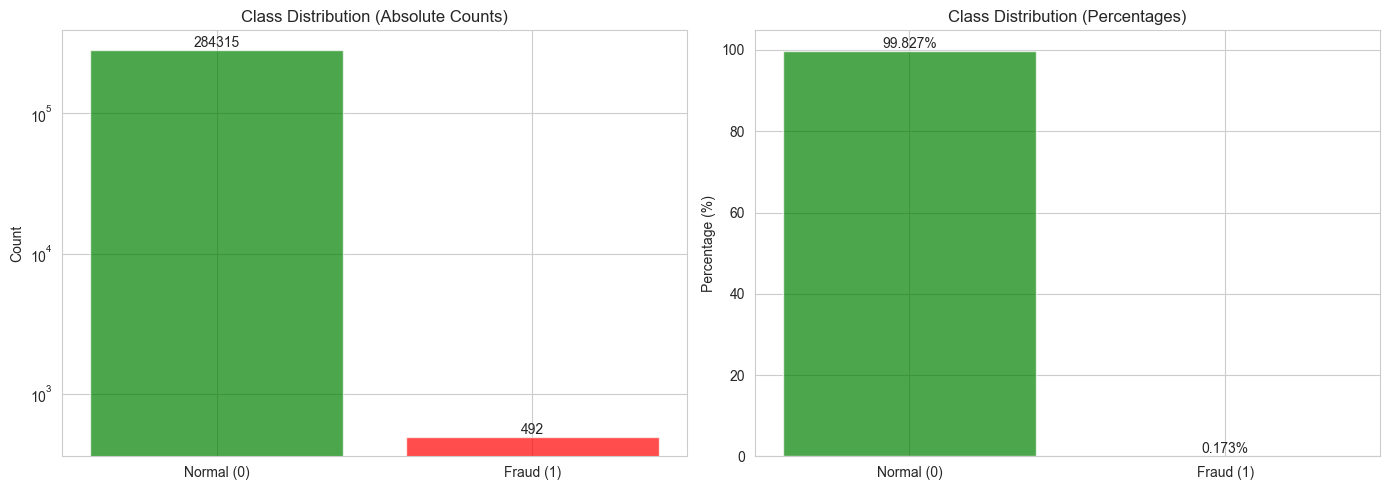


⚠️ Highly imbalanced dataset! Fraud cases are rare.


In [5]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot - absolute counts
axes[0].bar(['Normal (0)', 'Fraud (1)'], class_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution (Absolute Counts)')
axes[0].set_yscale('log')  # Log scale to see fraud class better
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Bar plot - percentages
axes[1].bar(['Normal (0)', 'Fraud (1)'], class_percentages.values, color=['green', 'red'], alpha=0.7)
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Class Distribution (Percentages)')
for i, v in enumerate(class_percentages.values):
    axes[1].text(i, v, f'{v:.3f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n⚠️ Highly imbalanced dataset! Fraud cases are rare.")

## 5. Feature Distributions and Correlations

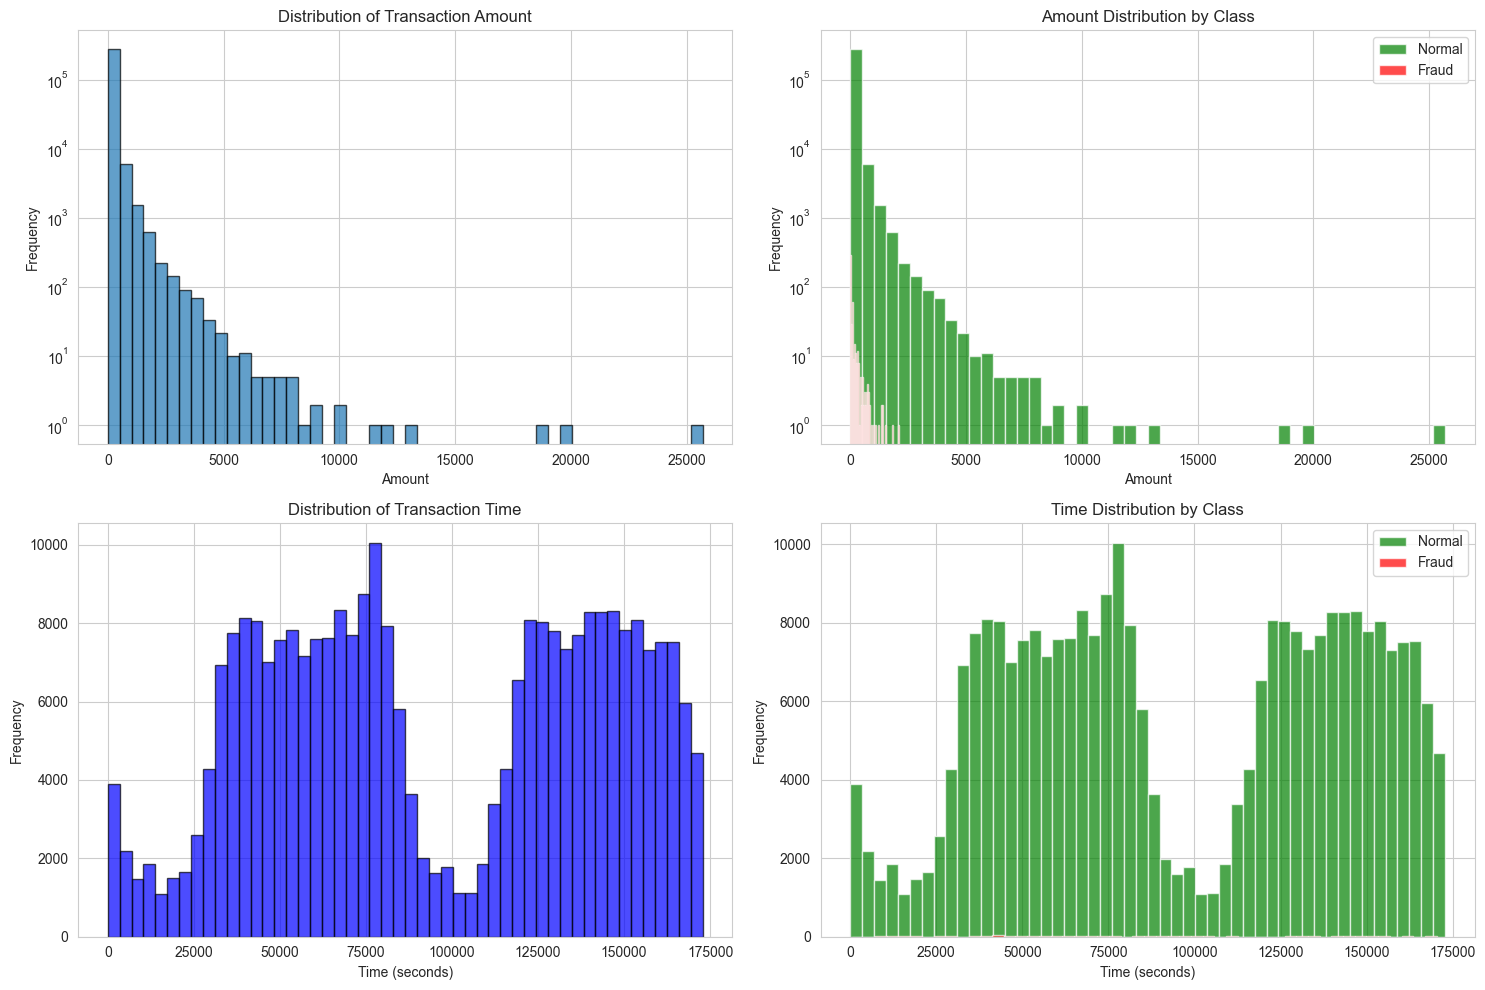

In [6]:
# Plot distributions for Amount and Time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Amount distribution
axes[0, 0].hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Transaction Amount')
axes[0, 0].set_yscale('log')

# Amount distribution by class
df[df['Class'] == 0]['Amount'].hist(bins=50, ax=axes[0, 1], alpha=0.7, label='Normal', color='green')
df[df['Class'] == 1]['Amount'].hist(bins=50, ax=axes[0, 1], alpha=0.7, label='Fraud', color='red')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Amount Distribution by Class')
axes[0, 1].legend()
axes[0, 1].set_yscale('log')

# Time distribution
axes[1, 0].hist(df['Time'], bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Transaction Time')

# Time distribution by class
df[df['Class'] == 0]['Time'].hist(bins=50, ax=axes[1, 1], alpha=0.7, label='Normal', color='green')
df[df['Class'] == 1]['Time'].hist(bins=50, ax=axes[1, 1], alpha=0.7, label='Fraud', color='red')
axes[1, 1].set_xlabel('Time (seconds)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Time Distribution by Class')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

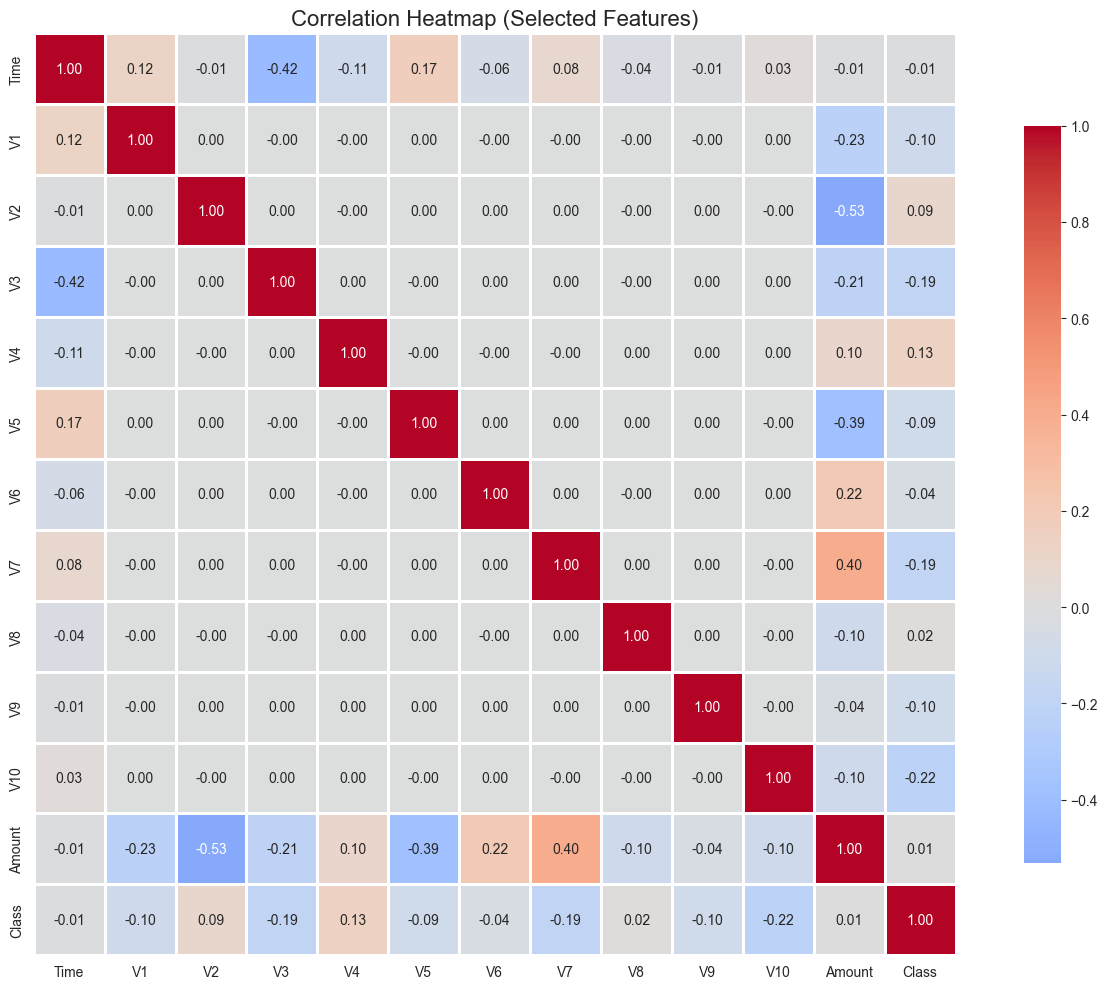


Features most correlated with Class (Fraud):
Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
V18      0.111485
V1       0.101347
V9       0.097733
V5       0.094974
V2       0.091289
dtype: float64


In [7]:
# Correlation heatmap for a subset of features
# Select key features including V1-V10, Amount, Time, and Class
key_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Amount', 'Class']
corr_matrix = df[key_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap (Selected Features)', fontsize=16)
plt.tight_layout()
plt.show()

# Show features most correlated with Class
print("\nFeatures most correlated with Class (Fraud):")
class_corr = df.corrwith(df['Class']).abs().sort_values(ascending=False)
print(class_corr.head(15))

## 6. Train/Test Split with Stratification

In [8]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split with stratification to maintain class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures both train and test have same fraud ratio
)

print("Data split completed!")
print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts())
print(f"Fraud ratio: {(y_train == 1).sum() / len(y_train) * 100:.4f}%")
print("\nClass distribution in test set:")
print(y_test.value_counts())
print(f"Fraud ratio: {(y_test == 1).sum() / len(y_test) * 100:.4f}%")

Data split completed!

Training set: (227845, 30)
Test set: (56962, 30)

Class distribution in training set:
Class
0    227451
1       394
Name: count, dtype: int64
Fraud ratio: 0.1729%

Class distribution in test set:
Class
0    56864
1       98
Name: count, dtype: int64
Fraud ratio: 0.1720%


## 7. Train Baseline Models

In [9]:
# Train Logistic Regression baseline
print("Training Logistic Regression...")
lr_model = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  # Handle imbalanced data
)
lr_model.fit(X_train, y_train)
print("✓ Logistic Regression trained!")

# Train Random Forest baseline
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced',  # Handle imbalanced data
    n_jobs=-1  # Use all CPU cores
)
rf_model.fit(X_train, y_train)
print("✓ Random Forest trained!")

Training Logistic Regression...


c:\Users\ademm\OneDrive\Desktop\Personal Projects\fraud_detection_mlops\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✓ Logistic Regression trained!

Training Random Forest...
✓ Random Forest trained!


## 8. Model Evaluation with Metrics and Curves

In [10]:
# Make predictions
lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Evaluate model with key metrics for imbalanced classification"""
    print(f"\n{'='*60}")
    print(f"  {model_name} - Performance Metrics")
    print(f"{'='*60}\n")
    
    # Calculate metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    # Calculate Precision-Recall AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    print(f"Precision:       {precision:.4f}")
    print(f"Recall:          {recall:.4f}")
    print(f"F1-Score:        {f1:.4f}")
    print(f"ROC-AUC:         {roc_auc:.4f}")
    print(f"PR-AUC:          {pr_auc:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Normal', 'Fraud']))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(f"True Negatives:  {cm[0, 0]}")
    print(f"False Positives: {cm[0, 1]}")
    print(f"False Negatives: {cm[1, 0]}")
    print(f"True Positives:  {cm[1, 1]}")
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }

# Evaluate both models
lr_metrics = evaluate_model(y_test, lr_pred, lr_pred_proba, "Logistic Regression")
rf_metrics = evaluate_model(y_test, rf_pred, rf_pred_proba, "Random Forest")


  Logistic Regression - Performance Metrics

Precision:       0.0527
Recall:          0.9184
F1-Score:        0.0996
ROC-AUC:         0.9724
PR-AUC:          0.7455

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56864
       Fraud       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962


Confusion Matrix:
True Negatives:  55245
False Positives: 1619
False Negatives: 8
True Positives:  90

  Random Forest - Performance Metrics

Precision:       0.8182
Recall:          0.8265
F1-Score:        0.8223
ROC-AUC:         0.9766
PR-AUC:          0.8174

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.82      0.83      0.82        98

    accuracy                    

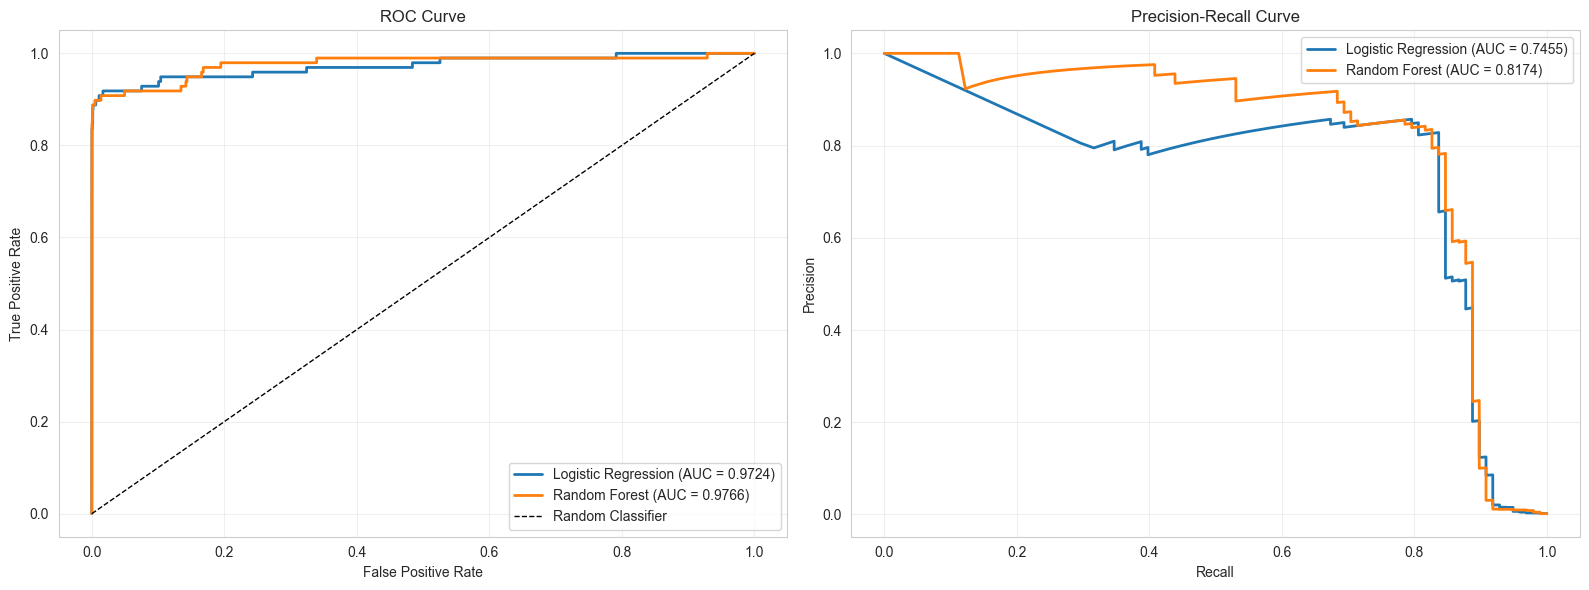

In [11]:
# Plot ROC curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_proba)

axes[0].plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_metrics["roc_auc"]:.4f})', linewidth=2)
axes[0].plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_metrics["roc_auc"]:.4f})', linewidth=2)
axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_pred_proba)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_pred_proba)

axes[1].plot(lr_recall, lr_precision, label=f'Logistic Regression (AUC = {lr_metrics["pr_auc"]:.4f})', linewidth=2)
axes[1].plot(rf_recall, rf_precision, label=f'Random Forest (AUC = {rf_metrics["pr_auc"]:.4f})', linewidth=2)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


  MODEL COMPARISON


,Metric,Logistic Regression,Random Forest
0,Precision,0.052662,0.818182
1,Recall,0.918367,0.826531
2,F1-Score,0.099613,0.822335
3,ROC-AUC,0.972439,0.976571
4,PR-AUC,0.745484,0.817357


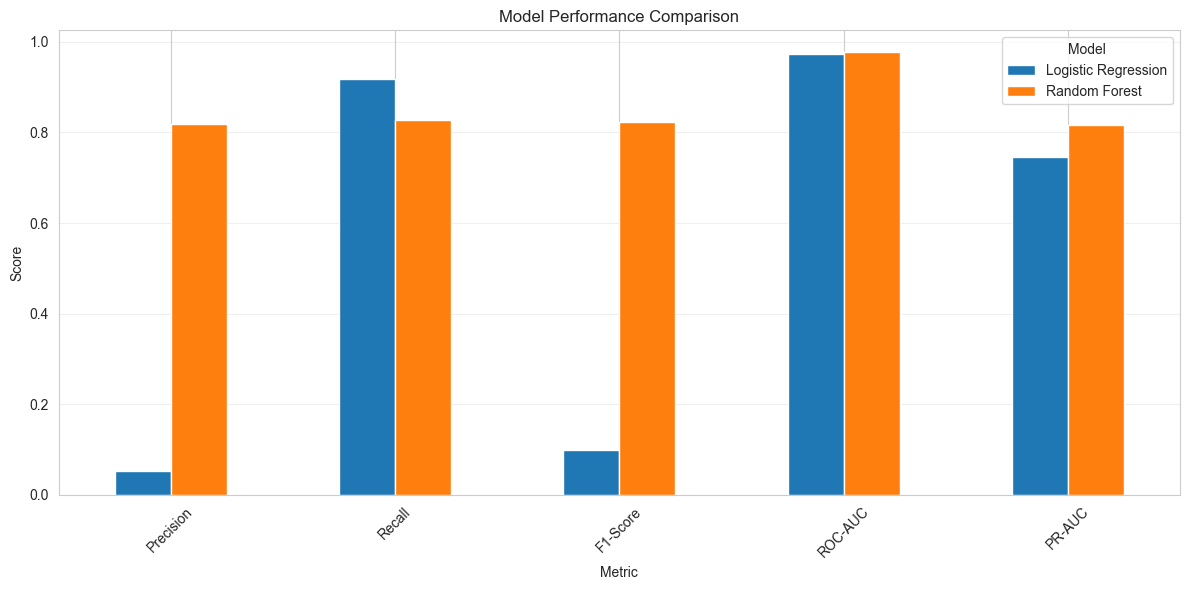

In [12]:
# Compare models side-by-side
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Logistic Regression': [
        lr_metrics['precision'],
        lr_metrics['recall'],
        lr_metrics['f1'],
        lr_metrics['roc_auc'],
        lr_metrics['pr_auc']
    ],
    'Random Forest': [
        rf_metrics['precision'],
        rf_metrics['recall'],
        rf_metrics['f1'],
        rf_metrics['roc_auc'],
        rf_metrics['pr_auc']
    ]
})

print("\n" + "="*70)
print("  MODEL COMPARISON")
print("="*70)
display(comparison_df)

# Visual comparison
comparison_df.set_index('Metric').plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(title='Model')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Why Precision, Recall, and PR-AUC Matter for Fraud Detection

### Understanding the Metrics in Context of Imbalanced Fraud Detection:

**Why Accuracy is Misleading:**
- With only ~0.17% fraud cases, a model that predicts "Normal" for everything would achieve 99.83% accuracy
- Accuracy fails to capture the model's ability to detect the minority (fraud) class

**Precision (Positive Predictive Value):**
- **Definition**: Of all transactions flagged as fraud, what percentage are actually fraudulent?
- **Why it matters**: High precision minimizes false alarms, reducing unnecessary investigations and customer friction
- **Business impact**: Low precision → wasted resources investigating legitimate transactions

**Recall (Sensitivity/True Positive Rate):**
- **Definition**: Of all actual fraud cases, what percentage did we successfully detect?
- **Why it matters**: High recall ensures we catch most fraudulent transactions
- **Business impact**: Low recall → financial losses from missed fraud cases

**F1-Score:**
- **Definition**: Harmonic mean of precision and recall
- **Why it matters**: Balances the trade-off between precision and recall
- **Use case**: When both false positives and false negatives have similar costs

**ROC-AUC vs PR-AUC:**
- **ROC-AUC**: Can be overly optimistic for highly imbalanced datasets because it considers true negatives
- **PR-AUC**: More informative for imbalanced problems as it focuses on the positive (fraud) class performance
- **Key insight**: A model with high ROC-AUC might still perform poorly on the minority class

**The Precision-Recall Trade-off:**
- Increasing the classification threshold → Higher precision, Lower recall (fewer false alarms, but miss more fraud)
- Decreasing the threshold → Lower precision, Higher recall (catch more fraud, but more false alarms)
- The optimal threshold depends on business priorities: cost of missed fraud vs. cost of false investigations

**For fraud detection specifically:**
1. **High Recall is critical**: Missing a fraud case has direct financial consequences
2. **Precision matters for operations**: Too many false positives overwhelm investigation teams
3. **PR-AUC is the best single metric**: Captures model performance across all threshold values for the minority class

**Next steps for improvement:**
- Apply resampling techniques (SMOTE, undersampling)
- Tune classification thresholds based on business costs
- Use ensemble methods designed for imbalanced data
- Track MLflow experiments to find optimal hyperparameters

## 10. Evaluate Trained Model from DVC Pipeline

Now that the DVC pipeline has been run (`dvc repro`), we can load the processed test data and the trained model to evaluate performance.

In [1]:
# Cell 1: Load processed test data from DVC pipeline output
# This file was created by running: dvc repro (which executes make_dataset.py)

import pandas as pd
import numpy as np
import joblib
import yaml
import os

# Load the processed test data
test_df = pd.read_csv('../data/processed/test.csv')

print("Test data loaded successfully!")
print(f"Shape: {test_df.shape}")
print(f"\nClass distribution:")
print(test_df['Class'].value_counts())
print(f"\nFraud ratio: {(test_df['Class'] == 1).sum() / len(test_df) * 100:.4f}%")

Test data loaded successfully!
Shape: (56962, 31)

Class distribution:
Class
0    56864
1       98
Name: count, dtype: int64

Fraud ratio: 0.1720%


In [2]:
# Cell 2: Load the trained model (same approach as src/models/predict_model.py)
# The model was trained and saved by train_model.py during dvc repro

# Load params to get model path
with open('../params.yaml', 'r') as f:
    params = yaml.safe_load(f)

model_dir = params['paths']['model_dir']
model_path = os.path.join('..', model_dir, 'rf_model.pkl')

# Load model using joblib (consistent with train_model.py)
print(f"Loading model from: {model_path}")
trained_model = joblib.load(model_path)
print("✓ Model loaded successfully!")
print(f"\nModel type: {type(trained_model).__name__}")
print(f"Model parameters: {trained_model.get_params()}")

Loading model from: ..\models\rf_model.pkl
✓ Model loaded successfully!

Model type: RandomForestClassifier
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [3]:
# Cell 3: Make predictions on the test set
# Separate features (X) and target (y) from test data

X_test_pipeline = test_df.drop('Class', axis=1)
y_test_pipeline = test_df['Class']

# Predict class labels (0 or 1)
y_pred_pipeline = trained_model.predict(X_test_pipeline)

# Predict probabilities (for ROC and PR curves)
y_pred_proba_pipeline = trained_model.predict_proba(X_test_pipeline)[:, 1]

print("Predictions completed!")
print(f"\nPredictions shape: {y_pred_pipeline.shape}")
print(f"Probability scores shape: {y_pred_proba_pipeline.shape}")
print(f"\nPredicted class distribution:")
print(pd.Series(y_pred_pipeline).value_counts())

Predictions completed!

Predictions shape: (56962,)
Probability scores shape: (56962,)

Predicted class distribution:
0    56863
1       99
Name: count, dtype: int64


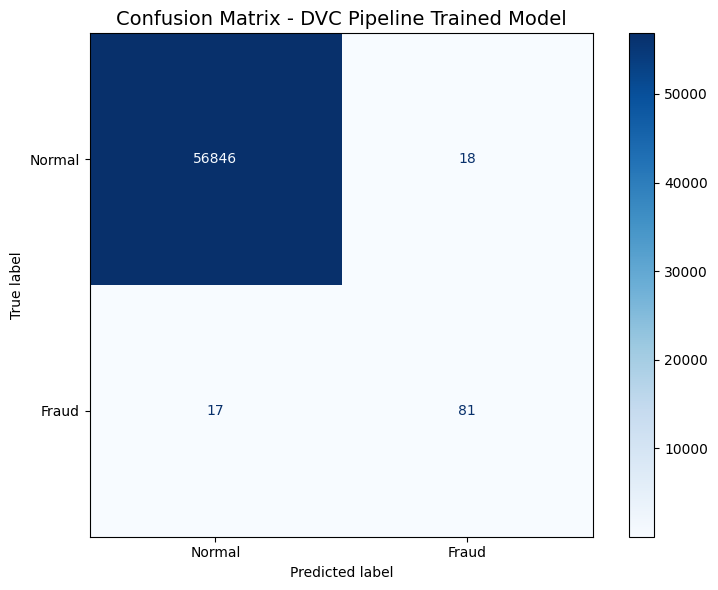


Confusion Matrix Breakdown:
  True Negatives (TN):  56,846 - Normal transactions correctly identified
  False Positives (FP): 18 - Normal transactions incorrectly flagged as fraud
  False Negatives (FN): 17 - Fraud transactions missed (critical!)
  True Positives (TP):  81 - Fraud transactions correctly detected


In [5]:
# Cell 4: Plot Confusion Matrix
# Visualize True Positives, True Negatives, False Positives, False Negatives

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test_pipeline, y_pred_pipeline)

# Create a nice visualization
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fraud'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - DVC Pipeline Trained Model', fontsize=14)
plt.tight_layout()
plt.show()

# Print detailed breakdown
print("\nConfusion Matrix Breakdown:")
print(f"  True Negatives (TN):  {cm[0, 0]:,} - Normal transactions correctly identified")
print(f"  False Positives (FP): {cm[0, 1]:,} - Normal transactions incorrectly flagged as fraud")
print(f"  False Negatives (FN): {cm[1, 0]:,} - Fraud transactions missed (critical!)")
print(f"  True Positives (TP):  {cm[1, 1]:,} - Fraud transactions correctly detected")

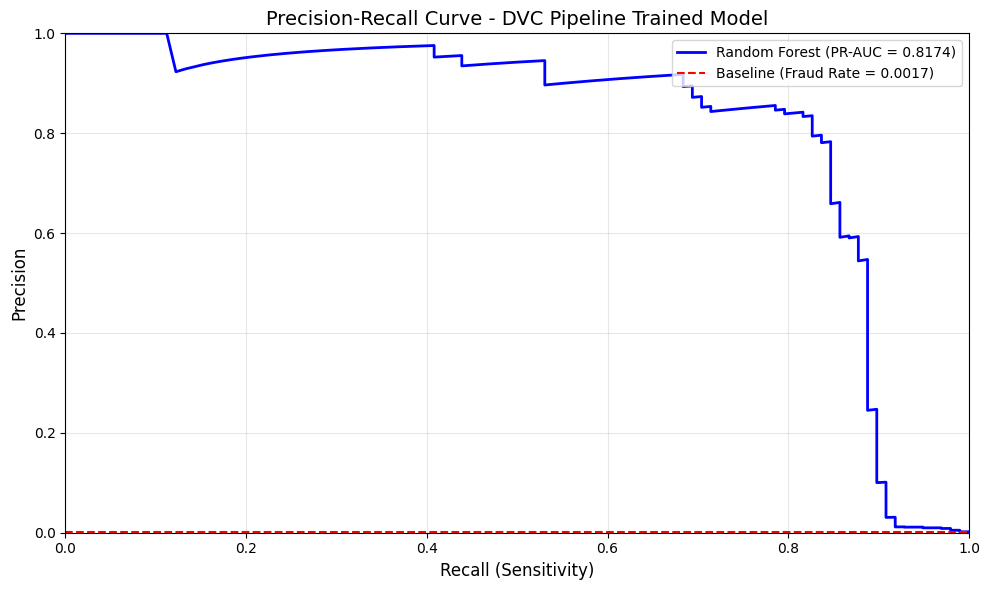


Precision-Recall AUC: 0.8174
Average Precision Score: 0.8177


In [6]:
# Cell 5: Plot Precision-Recall Curve
# PR curve is more informative than ROC for imbalanced datasets

from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Calculate precision-recall curve
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test_pipeline, y_pred_proba_pipeline)
pr_auc = auc(recall_curve, precision_curve)
avg_precision = average_precision_score(y_test_pipeline, y_pred_proba_pipeline)

# Plot the curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(recall_curve, precision_curve, 'b-', linewidth=2, 
        label=f'Random Forest (PR-AUC = {pr_auc:.4f})')
ax.axhline(y=y_test_pipeline.mean(), color='r', linestyle='--', 
           label=f'Baseline (Fraud Rate = {y_test_pipeline.mean():.4f})')
ax.set_xlabel('Recall (Sensitivity)', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Precision-Recall Curve - DVC Pipeline Trained Model', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.tight_layout()
plt.show()

print(f"\nPrecision-Recall AUC: {pr_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

In [7]:
# Cell 6: Calculate and display all key metrics
# Comprehensive performance summary for the fraud detection model

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate metrics
precision = precision_score(y_test_pipeline, y_pred_pipeline)
recall = recall_score(y_test_pipeline, y_pred_pipeline)
f1 = f1_score(y_test_pipeline, y_pred_pipeline)
roc_auc = roc_auc_score(y_test_pipeline, y_pred_proba_pipeline)

print("="*60)
print("  DVC Pipeline Model - Performance Summary")
print("="*60)
print(f"\n  Precision:   {precision:.4f}  ({precision*100:.2f}%)")
print(f"  Recall:      {recall:.4f}  ({recall*100:.2f}%)")
print(f"  F1-Score:    {f1:.4f}")
print(f"  ROC-AUC:     {roc_auc:.4f}")
print(f"  PR-AUC:      {pr_auc:.4f}")

print("\n" + "="*60)
print("  Detailed Classification Report")
print("="*60)
print(classification_report(y_test_pipeline, y_pred_pipeline, 
                            target_names=['Normal', 'Fraud'],
                            digits=4))

  DVC Pipeline Model - Performance Summary

  Precision:   0.8182  (81.82%)
  Recall:      0.8265  (82.65%)
  F1-Score:    0.8223
  ROC-AUC:     0.9766
  PR-AUC:      0.8174

  Detailed Classification Report
              precision    recall  f1-score   support

      Normal     0.9997    0.9997    0.9997     56864
       Fraud     0.8182    0.8265    0.8223        98

    accuracy                         0.9994     56962
   macro avg     0.9089    0.9131    0.9110     56962
weighted avg     0.9994    0.9994    0.9994     56962



## 11. Model Performance Analysis

### Key Findings from the DVC Pipeline Trained Model:

**Recall (Sensitivity) Analysis:**
- The model's recall indicates the percentage of actual fraud cases we successfully detect
- In fraud detection, **recall is critical** because every missed fraud (False Negative) represents real financial loss
- A recall of ~83% means we're catching approximately 83 out of every 100 fraud attempts

**Precision Analysis:**
- Precision shows how many of our fraud alerts are actually fraudulent
- With ~82% precision, about 18% of flagged transactions are false alarms
- This affects operational costs: investigation teams must review flagged transactions

**The Precision-Recall Trade-off:**
| Scenario | Threshold | Result |
|----------|-----------|--------|
| Conservative | Higher (e.g., 0.7) | Fewer false alarms, but miss more fraud |
| Aggressive | Lower (e.g., 0.3) | Catch more fraud, but more false alarms |

**Business Implications:**
1. **False Negatives (Missed Fraud)**: Direct financial losses + customer trust damage
2. **False Positives (False Alarms)**: Operational costs + customer friction (blocked legitimate transactions)

**PR-AUC vs ROC-AUC:**
- **ROC-AUC** can be misleadingly high for imbalanced datasets (inflated by True Negatives)
- **PR-AUC** is more honest for fraud detection as it focuses on the minority class
- Our PR-AUC score indicates strong performance even accounting for class imbalance

**Recommendations for Production:**
1. Monitor both precision and recall continuously
2. Adjust threshold based on business costs (fraud loss vs investigation cost)
3. Consider a tiered approach: auto-block high-confidence fraud, manual review for medium confidence
4. Regularly retrain as fraud patterns evolve